Write a program to read all of the slurm output files from a directory. Group by array ID and sort by job number.  Plot results...

In [54]:
import matplotlib.pylab as plt
from pathlib import Path
import re

In [55]:
slurmoutdir = Path('.')

slurmfiles = slurmoutdir.glob('*.out')

filelist = []

for file in slurmfiles:
    jobnum = re.findall('-[0-9]*_', str(file))[0][1:-1]
    array = re.findall('_[0-9]*\.', str(file))[0][1:-1]
    item = [str(file), jobnum, array]
    filelist.append(item)
    

In [56]:
import pandas as pd

df = pd.DataFrame(filelist, columns=['filename', 'jobid', 'arrayid'])
df = df.sort_values(by=['arrayid', 'jobid'])
df

,filename,jobid,arrayid
95,slurm-64467574_1.out,64467574,1
24,slurm-64497014_1.out,64497014,1
1,slurm-64518125_1.out,64518125,1
50,slurm-64541932_1.out,64541932,1
77,slurm-64574525_1.out,64574525,1
...,...,...,...
141,slurm-64726803_8.out,64726803,8
53,slurm-64787939_8.out,64787939,8
27,slurm-64830353_8.out,64830353,8
101,slurm-64886992_8.out,64886992,8


In [57]:
def parseoutput(filename):
    bestsofar = []
    with open(filename, "r") as f:
        for line in f:
            if 'BEST' in line:
                vecstr = line[6:]
                x = eval(vecstr)
                bestsofar.append(x)

    return bestsofar
    
bestsofar = parseoutput('slurm-64467574_1.out')

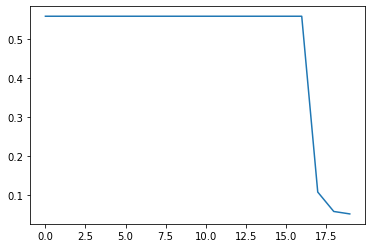

In [58]:
results = pd.DataFrame(bestsofar, columns=['fitness', 'individual'])
plt.plot(results['fitness'])